In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import plotly.express as px
#datasets
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
#model creation
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score

from sklearn.pipeline import Pipeline, make_pipeline
#models
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor

from sklearn.linear_model import Ridge,Lasso,LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')



# IRIS data set : LogisticRegression

In [2]:
iris = load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [3]:
target = "target"
X = df.drop(columns=target)
y = df[target]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [5]:
acc_baseline =  y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 2))

Baseline Accuracy: 0.34


In [6]:
df.select_dtypes("object").nunique()

Series([], dtype: float64)

In [7]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [8]:
acc_train = accuracy_score(y_train,model.predict(X_train))
acc_test = accuracy_score(y_test,model.predict(X_test))

print("Training Accuracy:", round(acc_train, 2))
print("Test Accuracy:", round(acc_test, 2))

Training Accuracy: 0.98
Test Accuracy: 1.0


# Breast_cancer

In [9]:
cancer = load_breast_cancer()

In [10]:
df=pd.DataFrame(data=cancer.data,columns=cancer.feature_names)
df["target"]=cancer.target

In [11]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [12]:
target="target"
X=df.drop(columns=target)
y=df[target]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)



# N neighbour Classifier

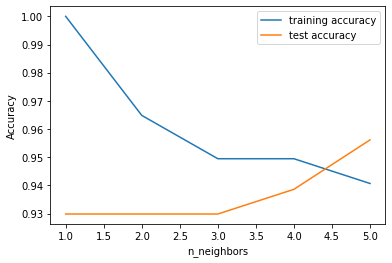

In [13]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 6)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

# KNeighborsRegressor

In [14]:
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=3)

In [15]:
print("training Score",model.score(X_train,y_train))
print("Test Score",model.score(X_test,y_test))

training Score 0.8682087143625605
Test Score 0.817447319576373


# Linear Regression

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
print("training Score",model.score(X_train,y_train))
print("Test Score",model.score(X_test,y_test))

training Score 0.7789778474553671
Test Score 0.727101612622355


# Ridge Rigression

In [18]:
model= Ridge()
model.fit(X_train,y_train)
print("training Score",round(model.score(X_train,y_train),2))
print("Test Score",round(model.score(X_test,y_test),2))

training Score 0.74
Test Score 0.75


# Lasoo regression

In [19]:
model= Lasso()
model.fit(X_train,y_train)
print("training Score",round(model.score(X_train,y_train),2))
print("Test Score",round(model.score(X_test,y_test),2))

training Score 0.55
Test Score 0.62


In [20]:
training_acc = []
Testing_acc = []
d=[0.1,0.01,0.001,0.0001,0.00001]
for i in d:
    model=Lasso(alpha=i, max_iter=100000).fit(X_train,y_train)
    training_acc.append(model.score(X_train,y_train))
    # Calculate validation accuracy score and append to `training_acc`
    Testing_acc.append(model.score(X_test,y_test))

print("Training Accuracy Scores:", training_acc)
print("Testing Accuracy Scores:", Testing_acc)

Training Accuracy Scores: [0.6641414096026015, 0.6831392034392827, 0.7353912622352607, 0.7658703009223978, 0.7783419148959907]
Testing Accuracy Scores: [0.6893625330713165, 0.7097467332255849, 0.7442740351682539, 0.7512697923736624, 0.7379979828288599]


# Logistic Regression

In [21]:
model=LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)
print("training Score",round(model.score(X_train,y_train),2))
print("Test Score",round(model.score(X_test,y_test),2))

training Score 0.96
Test Score 0.96


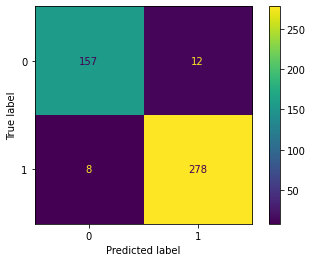

In [22]:
cm = confusion_matrix(y_train, model.predict(X_train))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

# DecisionTreeClassifier


In [23]:
model = DecisionTreeClassifier(random_state=42,max_depth=10)
# Fit model to training data
model.fit(X_train,y_train)
print("training Score",round(model.score(X_train,y_train),2))
print("Test Score",round(model.score(X_test,y_test),2))

training Score 1.0
Test Score 0.95


Tree Depth: 7


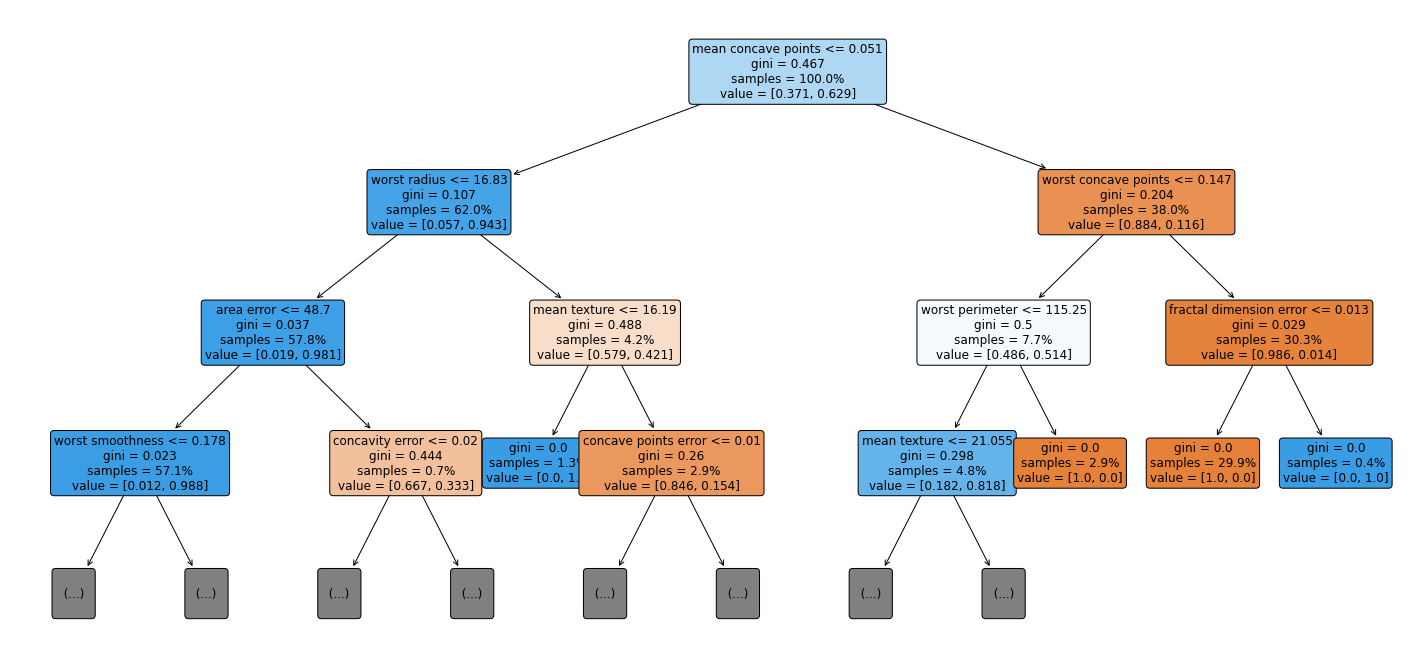

In [24]:
fig, ax = plt.subplots(figsize=(25, 12))
# Plot tree
plot_tree(
    decision_tree=model,
    feature_names=X_train.columns,
    filled=True,  # Color leaf with class
    rounded=True,  # Round leaf edges
    proportion=True,  # Display proportion of classes in leaf
    max_depth=3,  # Only display first 3 levels
    fontsize=12,  # Enlarge font
    ax=ax,  # Place in figure axis
);

tree_depth = model.get_depth()
print("Tree Depth:", tree_depth)

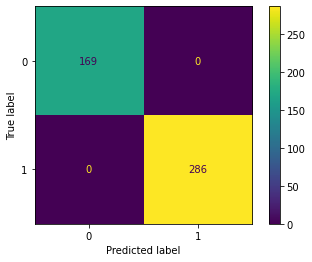

In [25]:
cm = confusion_matrix(y_train, model.predict(X_train))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [26]:
depth_hyperparams = range(1,50,2)
training_acc = []
validation_acc = []

for d in depth_hyperparams:
    # Create model with `max_depth` of `d`
    test_model = DecisionTreeClassifier(random_state=42,max_depth=d)
    # Fit model to training data
    test_model.fit(X_train, y_train)
    # Calculate training accuracy score and append to `training_acc`
    training_acc.append(test_model.score(X_train,y_train))
    # Calculate validation accuracy score and append to `training_acc`
    validation_acc.append(test_model.score(X_test,y_test))

print("Training Accuracy Scores:", training_acc[:3])
print("Testing Accuracy Scores:", validation_acc[:3])

Training Accuracy Scores: [0.9208791208791208, 0.978021978021978, 0.9956043956043956]
Testing Accuracy Scores: [0.8947368421052632, 0.9473684210526315, 0.9473684210526315]


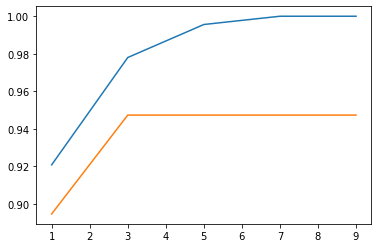

In [27]:
plt.plot(depth_hyperparams[:5],training_acc[:5],label="training")
plt.plot(depth_hyperparams[:5],validation_acc[:5],label="validation")

# RandomForestCLassifier

In [28]:
model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X_train,y_train)
print("training Score",round(model.score(X_train,y_train),2))
print("Test Score",round(model.score(X_test,y_test),2))

training Score 1.0
Test Score 0.96
